# XGB test


In [2]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [3]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from xgboost import XGBRegressor
import shap


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import linregress

from plots2.fns import (
    # standard_layout,
    # corner_annotations_colwise,
    # corner_annotations_rowwise,
    # get_text_annotation,
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import (
    trait_vec,
    gamma_dist,
    object_dump,
    object_load,
    load_train_test_data,
)

from poly2.config import Config

In [8]:
X_cv, y_cv, X_test, y_test = load_train_test_data('all')
X_cv.head(2)

,year,mu,b,asymp,dec_rate,m_prop,m_scale,ME_mean
0,1,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.397237
1,2,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.397237


In [13]:
y_test = 

array([[1. ],
       [1. ],
       [1. ],
       ...,
       [0.3],
       [0.3],
       [0.2]])

# Basic linear

In [9]:
model = LinearRegression().fit(X_cv, y_cv)

In [10]:
yp = model.predict(X_test)[:, 0]

In [17]:
res = pd.DataFrame(dict(
    linear_model = yp,
    data = y_test[:, 0]
))

(-0.1, 1.2)

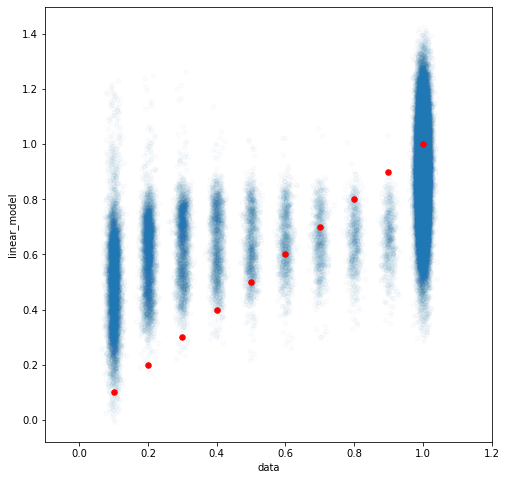

In [23]:
f, ax = plt.subplots(figsize=(8,8))

(
    res
    .assign(data = lambda x: x.data + np.random.normal(0, 0.01, x.shape[0]))
    .plot
    .scatter(
        x='data',
        y='linear_model', 
        alpha=0.02, 
        ax=ax
    )
)

ax.scatter(np.arange(0.1,1.1,0.1), np.arange(0.1,1.1,0.1), c='r', s=30)

ax.set_xlim([-0.1, 1.2])
# ax.set_ylim([-0.1, 1.2])

# Polynomial regression with interactions

In [24]:
interaction = PolynomialFeatures(degree=4, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_cv)

In [25]:
Xt_inter = interaction.fit_transform(X_test)

In [26]:
regr = LinearRegression()
model2 = regr.fit(X_inter, y_cv)

In [27]:
yp2 = model2.predict(Xt_inter)[:, 0]

In [28]:
res = res.assign(interactions = yp2)

(-0.1, 1.2)

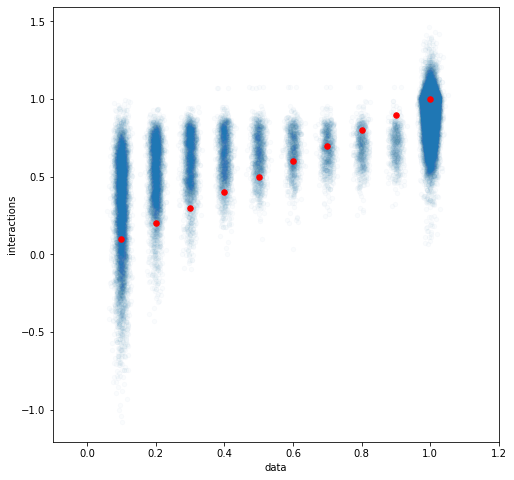

In [32]:
f, ax = plt.subplots(figsize=(8,8))

(
    res
    .assign(data = lambda x: x.data + np.random.normal(0, 0.01, x.shape[0]))
    .plot
    .scatter(
        x='data',
        y='interactions', 
        alpha=0.02, 
        ax=ax
    )
)


ax.scatter(np.arange(0.1,1.1,0.1), np.arange(0.1,1.1,0.1), c='r', s=30)

ax.set_xlim([-0.1, 1.2])

# R squared values

In [30]:
_, _, r_value, _, _ = linregress(res.data, res.linear_model)

r_value**2

0.42545940337915655

In [31]:
_, _, r_value, _, _ = linregress(res.data, res.interactions)

r_value**2

0.6174425125914897

# Conclusion

Although haven't spent any time optimising etc, the result is substantially worse than the default xgboost model or the optimised xgboost models (which get R^2 ~ 0.9).